In [149]:
from utils.summary_table_formatting import module_names_short, parameter_names_short
import pandas as pd


df_module_names = pd.DataFrame(list(module_names_short.items()), columns=['Original name', 'New name'])
df_parameter_names = pd.DataFrame(list(parameter_names_short.items()), columns=['Original', 'New name'])

df_parameter_names.to_csv('parameter_table.csv', index=False)

In [16]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability


trace_file = "../multi_parameter/final_coverage_model_multi_parameter.nc"
variable_list = ['b_p']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "final_coverage_parameters_multi_transformed"



transformations = {
    #'a_m': logit_to_probability,
    'b_p': logit_to_probability,
    #'g_mp': logit_to_probability

}

table_location = f"tables/{file_name}.csv"
image_location = f"posterior_distributions/{file_name}.pdf"


### Generate Summary object

In [17]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [18]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../multi_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'Coverage')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (16080, 24)
Parameter Matrix shape: (16080, 66)
Interaction Matrix shape: (16080, 1584)
Observation Matrix shape: (16080, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_p[Elite|TestChangeProb],0.497,0.003,0.492,0.501,0.0,0.0,7516.0,14565.0,1.0
b_p[StatemInsertProb|TestDeleteProb],0.498,0.003,0.494,0.502,0.0,0.0,14106.0,15260.0,1.0
b_p[Elite|Pop],0.499,0.003,0.495,0.503,0.0,0.0,24169.0,15364.0,1.0
b_p[Elite|TestInsertProb],0.499,0.003,0.495,0.503,0.0,0.0,20242.0,13187.0,1.0
b_p[Elite|TourSize],0.499,0.003,0.494,0.502,0.0,0.0,15323.0,13734.0,1.0
b_p[Pop|TestChangeProb],0.499,0.002,0.496,0.503,0.0,0.0,26440.0,15352.0,1.0
b_p[Crossover|RandPert],0.499,0.002,0.496,0.503,0.0,0.0,29169.0,13499.0,1.0
b_p[Crossover|Pop],0.499,0.002,0.495,0.503,0.0,0.0,29626.0,14168.0,1.0
b_p[ChromLen|TourSize],0.499,0.002,0.495,0.503,0.0,0.0,31660.0,15352.0,1.0
b_p[ChromLen|TestDeleteProb],0.499,0.003,0.494,0.502,0.0,0.0,15688.0,15012.0,1.0


### Save summary table as CSV

In [19]:
summary.to_csv(table_location, index=True)

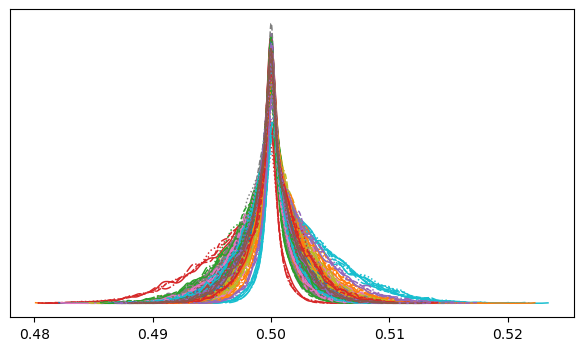

In [20]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()